In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df_p = df.copy()
le_dict = {}

# Categorical columns to encode
categorical_cols = [
    'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 
    'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 
    'Progesterone Status', 'Status'
]

# Normalize column names
df_p.columns = df_p.columns.str.strip()
categorical_cols = [c.strip() for c in categorical_cols if c.strip() in df_p.columns]

for col in categorical_cols:
    le = LabelEncoder()
    df_p[col] = le.fit_transform(df_p[col].astype(str))
    le_dict[col] = le

target = 'Status'
X = df_p.drop(columns=[target])
y = df_p[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (3219, 15)
Testing shape: (805, 15)


In [5]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9055900621118013

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.81      0.48      0.60       120

    accuracy                           0.91       805
   macro avg       0.86      0.73      0.78       805
weighted avg       0.90      0.91      0.90       805



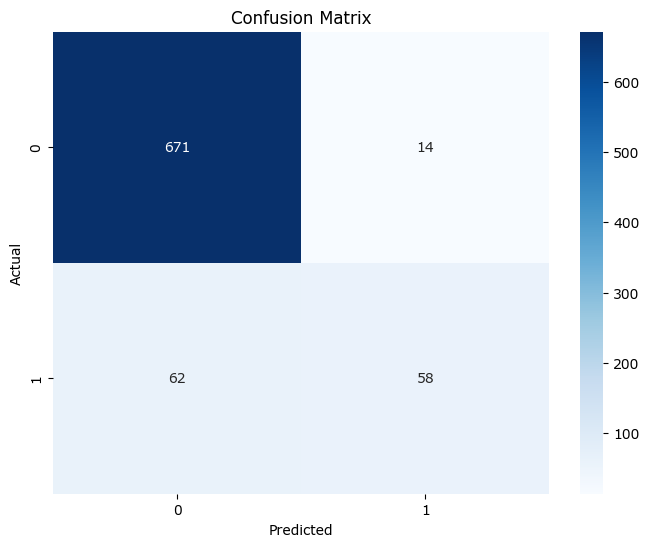

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14420\563148154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


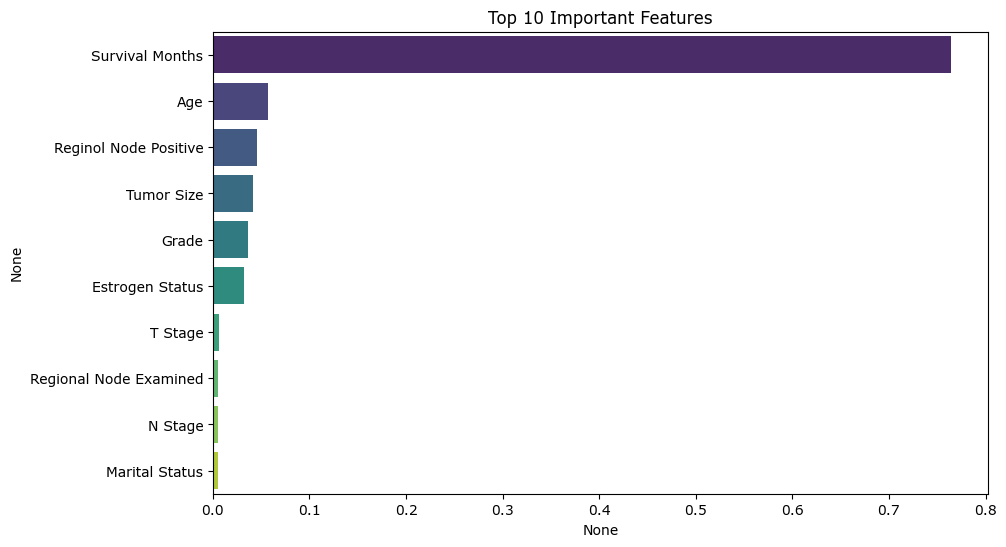

In [8]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.title('Top 10 Important Features')
plt.show()